# 1. Simulación de variables aleatorias

## 1.1. CDF es conocida e invertible

Suponga que $f_X(x)=x\textrm{e}^{-\frac{x^2}{2}}\mathbf{1}_{x\geq0}$ (distribución Rayleigh)

1. Calule la CDF
2. Invierta la CDF
3. Simule $10^6$ observaciones
4. Dibuje el histograma y superpongalo a la PDF

In [1]:
import numpy as np # Algebra matricial
from math import pi, exp, gamma, sqrt, log
import matplotlib.pyplot as plt # gráficos
from scipy.stats import invgamma 

import random # Simulacion aleatoria
random.seed( 0 ) # Fijando la semilla (reproducir resultados)
np.random.seed( 0 ) # Fijando la semilla (reproducir resultados)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

La CDF es
$$F_X(x)=\int_{-\infty}^xu\textrm{e}^{-\frac{u^2}{2}}du=1-\textrm{e}^{-\frac{x^2}{2}}$$
su inversa es
$$F_X^{-1}(u)=\sqrt{-2\log(1-u)}$$
creando $n=10^6$ simulaciones

In [2]:
nsample = 10**6
usim = np.random.uniform(0,1,(nsample,1))
xsim = np.sqrt(-2*np.log(1-usim))

generando gráficos

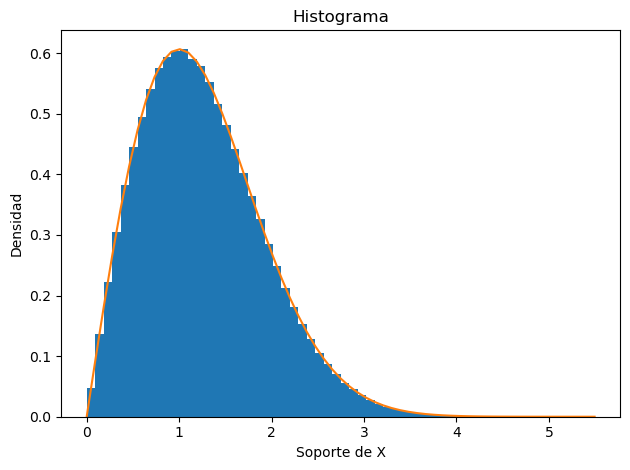

In [3]:
num_bins = 60
fig, ax = plt.subplots()
n, bins, patches = ax.hist(xsim, num_bins, density=1)
pdf = bins*np.exp(-bins**2/2)
ax.plot(bins, pdf)
ax.set_xlabel('Soporte de X')
ax.set_ylabel('Densidad')
ax.set_title(r'Histograma')
fig.tight_layout()

## 1.2. CDF no invertible: Aceptance-rejection algorithm
Del ejercicio anterior, suponga que $F_X(\cdot)$ no es invertible.
Definamos según la notación de las diapositivas:
* $h(x)=10^{-1}$ (i.e., $h\equiv U(0,10)$)
* $g(x)=x\textrm{e}^{-\frac{x^2}{2}}\mathbf{1}_{x\geq0}$

Calculemos $c$:
$$c=\sup_{x}\frac{g(x)}{h(x)}=\sup_{x}10x\textrm{e}^{-\frac{x^2}{2}}\mathbf{1}_{x\geq0}\Rightarrow x^*=1\text{ y }c=10\textrm{e}^{-\frac{1}{2}}$$

Construyamos una función que implemente el algoritmo:

$$g(x)=f(x)/k\text{ pero si hacemos }k=1\text{ entonces }0\leq\frac{g(x)}{ch(x)}\leq1$$

In [61]:
def get_AR_Rayleigh(c,n):
    count = 0
    rej   = 0
    x = np.zeros(shape=(n,1))
    while count < (n-1):
        # Simulación de U(0,10)
        z_candidato = 10*np.random.uniform(0,1)
        # Simulación de U(0,1)
        u = np.random.uniform(0,1)
        # Aceptar o rechazar
        f_de_candidato = z_candidato*exp(-z_candidato**2/2) #k=1
        h_de_candidato = 1.0/10
        if u <= f_de_candidato/(c*h_de_candidato):
            x[count,0] = z_candidato
            count  += 1
        else:
            rej += 1
    
    return x, rej

In [62]:
c = 10*exp(-1.0/2)*5
nsample = 5*10**4
xsim_AR, rej = get_AR_Rayleigh(c,nsample)

In [65]:
rej

1467424

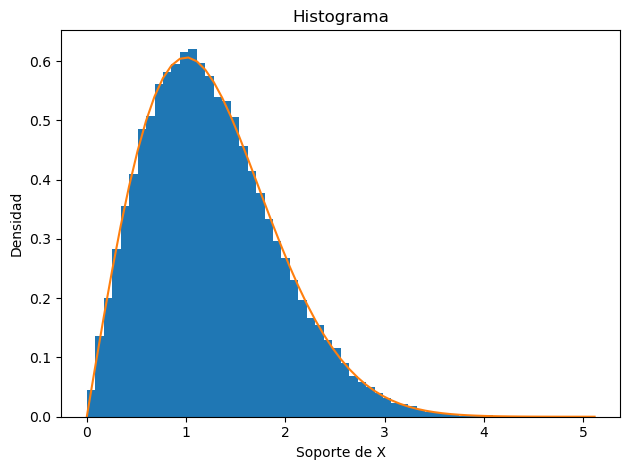

In [66]:
num_bins = 60
fig, ax = plt.subplots()
n, bins, patches = ax.hist(xsim_AR, num_bins, density=1)
pdf = bins*np.exp(-bins**2/2)
ax.plot(bins, pdf)
ax.set_xlabel('Soporte de X')
ax.set_ylabel('Densidad')
ax.set_title(r'Histograma')
fig.tight_layout()

## 1.3. Normal multivariada
Sea $X\sim\mathcal{N}(\mu,\Sigma)$ con $\mu=[0.5\ 5]$ y $\Sigma=\left[\begin{matrix}0.6 & -0.2\\ -0.2 & 0.1\end{matrix}\right]$ utilice la función ```np.random.randn``` para simular $10^6$ realizacioines de $X$

In [8]:
nsample = 10**6
mu = np.array([[0.5],[5]])
Sigma = np.array([[0.6, -0.2],[-0.2, 0.1]])
LTSigma = np.linalg.cholesky(Sigma)
zsim_vec = np.random.randn(2,nsample)
xsim_vec = np.dot(LTSigma,zsim_vec) + np.repeat(mu,nsample,axis=1)

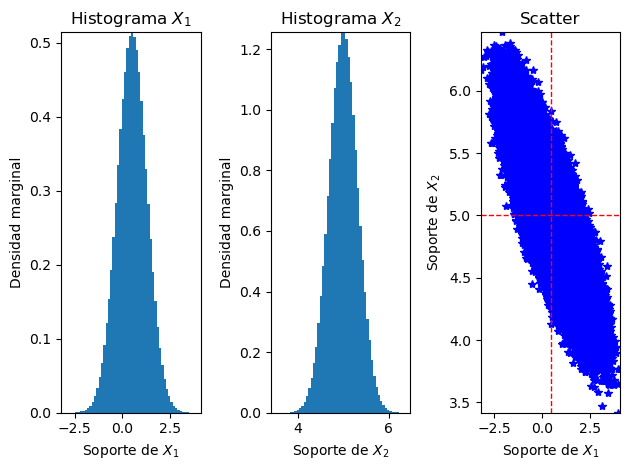

In [9]:
num_bins = 60
fig, (ax0, ax1, ax3) = plt.subplots(1,3)
n, bins, patches = ax0.hist(xsim_vec[0,:], num_bins, density=1)
ax0.set_xlabel('Soporte de $X_1$')
ax0.set_ylabel('Densidad marginal')
ax0.set_title(r'Histograma $X_1$')
ax0.autoscale(enable=True, axis='both', tight=True)

n, bins, patches = ax1.hist(xsim_vec[1,:], num_bins, density=1)
ax1.set_xlabel('Soporte de $X_2$')
ax1.set_ylabel('Densidad marginal')
ax1.set_title(r'Histograma $X_2$')
ax1.autoscale(enable=True, axis='both', tight=True)


line0, = ax3.plot(xsim_vec[0,:], xsim_vec[1,:], 'b*')
ax3.axhline(5, color='red', lw=1,ls='--')
ax3.axvline(0.5, color='red', lw=1,ls='--')
ax3.set_xlabel('Soporte de $X_1$')
ax3.set_ylabel('Soporte de $X_2$')
ax3.set_title(r'Scatter')
ax3.autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()

## 1.4. Gibbs-sampling

Con data del PBI, definir $y_t=\Delta\log(PBI_t)$ estimar 

$$y_t=\mu+\phi_1y_{t-1}+\phi_2y_{t-2}+\phi_3y_{t-3}+\phi_4y_{t-4}+\varepsilon_t$$

Es posible que necesiten instalar pandas_datareader. Dos opciones:

* En el terminal (de anaconda) escribi: ```pip install pandas-datareader``` y presionar enter

* En el notebook Jupyter escribir en una celda: ```!pip install pandas-datareader``` y ejecutar

1. Descargando la data

In [10]:
import pandas_datareader.data as web
import datetime

In [11]:
start = datetime.datetime(1952, 4, 1)
end = datetime.datetime(1995, 9, 30)
GDP = web.DataReader('GDP', 'fred', start, end)
GDP = GDP.values
data = np.diff(np.log(GDP)*100,n=1,axis=0)
T = data.shape[0]

In [12]:
web.DataReader('GDP', 'fred', start, end)

,GDP
DATE,
1952-04-01,361.030
1952-07-01,367.701
1952-10-01,380.812
1953-01-01,387.980
1953-04-01,391.749
...,...
1994-07-01,7331.075
1994-10-01,7455.288
1995-01-01,7522.289


2. Escribiendo el modelo en formato $y_t=x_t\beta+\varepsilon_t$ con $x_t=[1\ y_{t-1}\ y_{t-2}\ y_{t-3}\ y_{t-4}]$

In [13]:
lags = 4
y = np.reshape(data[lags:,0],(T-lags,1))
x = np.ones(shape=(T-lags,1))
for ii in range(lags):
        nx = np.reshape(data[(lags-(ii+1)):(T-(ii+1)),0],(T-lags,1))
        x = np.c_[x,nx]

In [14]:
x

array([[ 1.        ,  0.96675367,  1.86479769,  3.50357071,  1.83090505],
       [ 1.        , -0.14765241,  0.96675367,  1.86479769,  3.50357071],
       [ 1.        , -1.33851583, -0.14765241,  0.96675367,  1.86479769],
       [ 1.        , -0.16206093, -1.33851583, -0.14765241,  0.96675367],
       [ 1.        ,  0.20117549, -0.16206093, -1.33851583, -0.14765241],
       [ 1.        ,  1.25465379,  0.20117549, -0.16206093, -1.33851583],
       [ 1.        ,  2.21019961,  1.25465379,  0.20117549, -0.16206093],
       [ 1.        ,  3.28250069,  2.21019961,  1.25465379,  0.20117549],
       [ 1.        ,  2.02713611,  3.28250069,  2.21019961,  1.25465379],
       [ 1.        ,  2.04033363,  2.02713611,  3.28250069,  2.21019961],
       [ 1.        ,  1.58446691,  2.04033363,  2.02713611,  3.28250069],
       [ 1.        ,  0.60535882,  1.58446691,  2.04033363,  2.02713611],
       [ 1.        ,  1.41440858,  0.60535882,  1.58446691,  2.04033363],
       [ 1.        ,  1.15493799,  1.4

In [52]:
beta_prior = np.zeros(shape=(1+lags,1))
scale = 10**(3)
Sigma_prior = np.identity(1+lags)*scale
i_Sigma_prior = np.identity(1+lags)*(1/scale)
nu_prior = 0
delta_prior = 0

In [53]:
Sigma_prior

array([[1000.,    0.,    0.,    0.,    0.],
       [   0., 1000.,    0.,    0.,    0.],
       [   0.,    0., 1000.,    0.,    0.],
       [   0.,    0.,    0., 1000.,    0.],
       [   0.,    0.,    0.,    0., 1000.]])

In [54]:
def BetaSigma_cond_post(bprior,isprior,su2,y,x):
    T,k = x.shape
    
    ni_XX = isprior + (1/su2)*np.dot(np.transpose(x),x)
    Sigma_post = np.linalg.inv(ni_XX)

    XY = np.dot(isprior,bprior)+(1/su2)*np.dot(np.transpose(x),y)
    beta_post = np.dot(Sigma_post,XY)
    
    return (beta_post,Sigma_post)

def NuDelta_cond_post(vprior,dprior,b,y,x):
    T,k = x.shape
       
    nu_post = vprior + T
    
    YXB = y-np.dot(x,b)
    delta_post = (dprior + np.dot(np.transpose(YXB),YXB)).item()
    
    return (nu_post,delta_post)

def randmvn(mu,Sigma):
    k,er = mu.shape
    LTSigma = np.linalg.cholesky(Sigma)
    z_vec = np.random.randn(k,1)
    x_vec = np.dot(LTSigma,z_vec) + mu
    return x_vec

def randig(nu,delta): 
    return 1/np.random.gamma(nu/2, 2/delta)

In [55]:
T,k = x.shape
ni_XX = np.dot(np.transpose(x),x)
XY = np.dot(np.transpose(x),y)
beta_ols = np.linalg.solve(ni_XX,XY)

u_hat = y-np.dot(x,beta_ols)
sigma2_ols = np.sum(u_hat**2)/(T-k)

beta_ols_std = np.sqrt(np.diag(sigma2_ols*np.linalg.inv((np.dot(np.transpose(x),x)))))
beta_ols_std.shape = (k,1)

In [56]:
Betas = beta_ols*0+1000000
sigma2s = np.array([[sigma2_ols]])
bsample = 10**2
nsample = 10**3

In [57]:
for jj in range(bsample+nsample-1):
    sigma2_jm1 = sigma2s[0,jj]
    beta_post,Sigma_post = BetaSigma_cond_post(beta_prior,i_Sigma_prior,sigma2_jm1,y,x)
    beta_jj = randmvn(beta_post,Sigma_post)
    
    nu_post,delta_post = NuDelta_cond_post(nu_prior,delta_prior,beta_jj,y,x)
    sigma_jj = randig(nu_post,delta_post)
    
    Betas = np.c_[Betas,beta_jj]
    sigma2s = np.c_[sigma2s,sigma_jj]
    
Betas=np.delete(Betas, range(bsample), 1)
sigma2s=np.delete(sigma2s, range(bsample), 1)

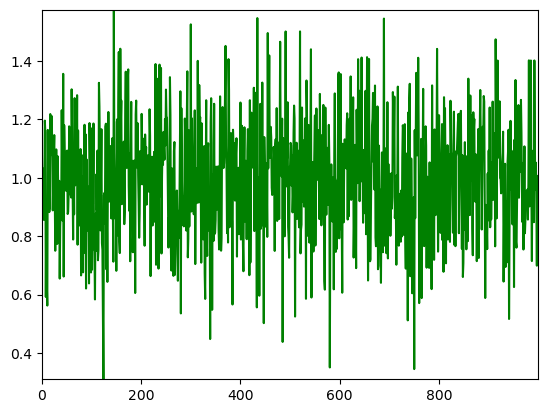

In [58]:
fig, axs = plt.subplots(1,1)
axs.plot(Betas[0,:1000],'g')
axs.autoscale(enable=True, axis='both', tight=True)


In [59]:
sigma2_mean = np.mean(sigma2s)
beta_mean = np.mean(Betas,axis=1)
beta_mean.shape = (k,1)

sigma2_std = np.std(sigma2s)
beta_std = np.std(Betas,axis=1)
beta_std.shape = (k,1)

sigma2_Q5 = np.percentile(sigma2s, 5)
beta_Q5 = np.percentile(Betas, 5, axis=1)
beta_Q5.shape = (k,1)

sigma2_Q95 = np.percentile(sigma2s, 95)
beta_Q95 = np.percentile(Betas, 95, axis=1)
beta_Q95.shape = (k,1)

In [60]:
print('|===========================================================================|')
print('|        | Prior       | Posterior                       | MCO              |')
print('|        |-------------|---------------------------------|------------------|') 
print('|        | Mean | SD   | Mean   | SD    | Q5     | Q95   | Est.   | SE      |')
print('|---------------------------------------------------------------------------|')
print('|mu      |  %1.0f   | %1.0f |  %1.3f | %1.3f |  %1.3f | %1.3f |  %1.3f | (%1.3f) |' %(beta_prior[0,0],Sigma_prior[0,0],beta_mean[0,0],beta_std[0,0],beta_Q5[0,0],beta_Q95[0,0],beta_ols[0,0],beta_ols_std[0,0]))
print('|phi1    |  %1.0f   | %1.0f |  %1.3f | %1.3f |  %1.3f | %1.3f |  %1.3f | (%1.3f) |' %(beta_prior[1,0],Sigma_prior[1,1],beta_mean[1,0],beta_std[1,0],beta_Q5[1,0],beta_Q95[1,0],beta_ols[1,0],beta_ols_std[1,0]))
print('|phi2    |  %1.0f   | %1.0f |  %1.3f | %1.3f |  %1.3f | %1.3f |  %1.3f | (%1.3f) |' %(beta_prior[2,0],Sigma_prior[2,2],beta_mean[2,0],beta_std[2,0],beta_Q5[2,0],beta_Q95[2,0],beta_ols[2,0],beta_ols_std[2,0]))
print('|phi3    |  %1.0f   | %1.0f | %1.3f | %1.3f | %1.3f | %1.3f | %1.3f | (%1.3f) |'  %(beta_prior[3,0],Sigma_prior[3,3],beta_mean[3,0],beta_std[3,0],beta_Q5[3,0],beta_Q95[3,0],beta_ols[3,0],beta_ols_std[3,0]))
print('|phi4    |  %1.0f   | %1.0f |  %1.3f | %1.3f | %1.3f | %1.3f |  %1.3f | (%1.3f) |' %(beta_prior[4,0],Sigma_prior[4,4],beta_mean[4,0],beta_std[4,0],beta_Q5[4,0],beta_Q95[4,0],beta_ols[4,0],beta_ols_std[4,0]))
print('|sigma^2 |  -   | -    |  %1.3f | %1.3f |  %1.3f | %1.3f |  %1.3f |' %(sigma2_mean,sigma2_std,sigma2_Q5,sigma2_Q95,sigma2_ols))
print('|===========================================================================|')


|===========================================================================|
|        | Prior       | Posterior                       | MCO              |
|        |-------------|---------------------------------|------------------|
|        | Mean | SD   | Mean   | SD    | Q5     | Q95   | Est.   | SE      |
|---------------------------------------------------------------------------|
|mu      |  0   | 1000 |  0.993 | 0.197 |  0.672 | 1.316 |  0.997 | (0.199) |
|phi1    |  0   | 1000 |  0.350 | 0.079 |  0.214 | 0.475 |  0.351 | (0.078) |
|phi2    |  0   | 1000 |  0.177 | 0.086 |  0.036 | 0.313 |  0.179 | (0.082) |
|phi3    |  0   | 1000 | -0.105 | 0.082 | -0.236 | 0.033 | -0.106 | (0.081) |
|phi4    |  0   | 1000 |  0.014 | 0.078 | -0.112 | 0.145 |  0.011 | (0.077) |
|sigma^2 |  -   | -    |  0.939 | 0.105 |  0.782 | 1.121 |  0.923 |
|===========================================================================|


## 1.5. Metropolis-Hasting
Del ejemplo anterior, supongamos que la distribuciones prior de $\beta$ y $\sigma$ son $\beta\sim t_v\left(\beta_*,\frac{\mu_*-2}{\mu_*}\Sigma_*\right)$ y $\sigma^2\sim U(0,100)$ donde $\mu$ son los grados de libertad de la distribución $t$ multivariada. Reproducir la tabla anterior para este caso.

La distribución posterior no es conocida en este caso; sin embargo, con Metropolis-Hasting podemos obtner simulaciones de la posterior. Apilemos los coeficientes en $\theta=[\beta^T \sigma^2]^T$, entonces la distribución posterior $p(\theta|Y)$ depende de la verosimilitud $p(Y|\theta)$, los priors $p(\theta)$ y la constante normalizadora $p(Y)$ según

$$p(\theta|Y)=\frac{f(x)=p(Y|\theta)p(\theta)}{k=p(Y)}\propto p(Y|\theta)p(\theta)$$

La verosimilitud se calcula con la distribución del error $u\sim\mathcal{N}(0,\sigma^2)$ donde $u=y-x\beta$

In [68]:
def get_log_verosimilitud(b,s2,y,x):
    T,k = y.shape
    err = y - np.dot(x,b)
    return -(1/2)*( log(s2)*T + np.sum(err**2)/s2 )

In [69]:
def get_log_prior(b,s2,b_prior,s_prior,df_prior):
    k,aux0 = b.shape
    tv1 = log( gamma((df_prior+k)/2)/(gamma(df_prior/2)*(df_prior**(k/2))*(np.linalg.det(s_prior)**(1/2))) )
    aux0 = np.dot(np.dot(np.transpose(b-b_prior),np.linalg.inv(s_prior)),b-b_prior)
    tv2 = -((df_prior+k)/2)*log( 1 + (1/df_prior)*aux0.item() )
    tv = tv1 + tv2
    return tv

In [70]:
def get_log_post_prop(b,s2,b_prior,s_prior,df_prior,y,x):
    likel = get_log_verosimilitud(b,s2,y,x)
    prior = get_log_prior(b,s2,b_prior,s_prior,df_prior)
    return ( likel + prior ).item()

In [71]:
from scipy.optimize import minimize
def get_mode(theta): 
    b = np.reshape(theta[0:5],(5,1))
    r = get_log_post_prop(b,theta[5],beta_prior,Sigma_prior,10,y,x)
    return -r

In [72]:
theta0 = np.r_[beta_prior,[[5]]].flatten()
res = minimize(get_mode, theta0, method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: 93.889211
         Iterations: 20
         Function evaluations: 175
         Gradient evaluations: 25


In [73]:
res.x

array([ 0.99735882,  0.35099008,  0.17950274, -0.10648027,  0.01070767,
        0.89598041])

$$x^{(j)}=x^{(j-1)}+z\text{ con }z\sim\mathcal{N}(0,scala*\Omega)$$

$$\alpha=\min\left[\frac{f(x^{*})}{f(x^{(j-1)})},1\right]$$

$$\log\alpha=\min\left[\log f(x^{*}) - \log f(x^{(j-1)}),0\right]$$

In [74]:
def get_MHsim(x0,n,b,LTOmega,scale):
    xsim = np.zeros(shape=(6,n+b))
    aceptance = 1
    for ii in range(n+b):
        if ii==0:
            xsim[:,ii] = np.ndarray.flatten(x0)
        else:
            candidate = xsim[:,ii-1]
            candidate.shape = (6,1)
            candidate = candidate + scale*np.dot(LTOmega,np.random.randn(6,1))
            eu = np.random.uniform(0,1)
            if eu < 1e-20:
                u = -10**10
            else:
                u = log(eu)
                
            b_old = np.reshape(xsim[:5,ii-1],(5,1))
            s2_old = xsim[5,ii-1]
            fx_old = get_log_post_prop(b_old,s2_old,beta_prior,Sigma_prior,10,y,x)
            b_new = np.reshape(candidate[:5,0],(5,1))
            s2_new = candidate[5,0]
            fx_new = get_log_post_prop(b_new,s2_new,beta_prior,Sigma_prior,10,y,x)            
            alpha = min( fx_new-fx_old,0 )
            if u <= alpha:
                xsim[:,ii] = np.ndarray.flatten(candidate)
                aceptance += 1
            else:
                xsim[:,ii] = xsim[:,ii-1]
            
        
        
    xsim = np.delete(xsim, range(b), 1)
    return xsim, (aceptance/(n+b))*100

In [75]:
x0 = res.x
LTOmega = np.linalg.cholesky(res.hess_inv)
scale = 0.90
x0.shape = (6,1)
xsim_MH, aceptance = get_MHsim(x0,nsample,bsample,LTOmega,scale)
aceptance

31.42714570858283

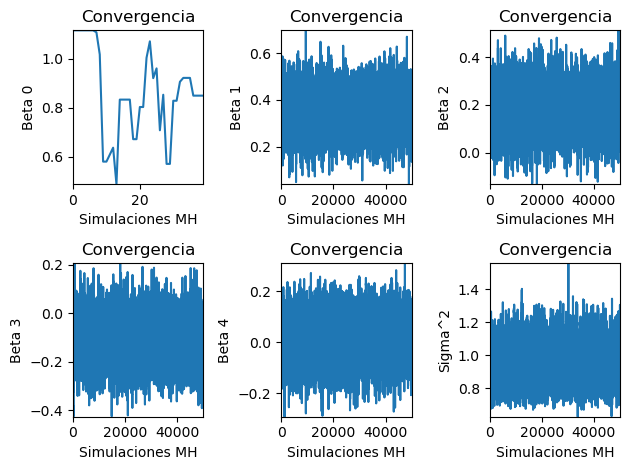

In [78]:
fig, axs = plt.subplots(2,3)

line0, = axs[0,0].plot(xsim_MH[0,:40])
axs[0,0].set_xlabel('Simulaciones MH')
axs[0,0].set_ylabel('Beta 0')
axs[0,0].set_title(r'Convergencia')
axs[0,0].autoscale(enable=True, axis='both', tight=True)

line1, = axs[0,1].plot(xsim_MH[1,:])
axs[0,1].set_xlabel('Simulaciones MH')
axs[0,1].set_ylabel('Beta 1')
axs[0,1].set_title(r'Convergencia')
axs[0,1].autoscale(enable=True, axis='both', tight=True)

line1, = axs[0,2].plot(xsim_MH[2,:])
axs[0,2].set_xlabel('Simulaciones MH')
axs[0,2].set_ylabel('Beta 2')
axs[0,2].set_title(r'Convergencia')
axs[0,2].autoscale(enable=True, axis='both', tight=True)

line1, = axs[1,0].plot(xsim_MH[3,:])
axs[1,0].set_xlabel('Simulaciones MH')
axs[1,0].set_ylabel('Beta 3')
axs[1,0].set_title(r'Convergencia')
axs[1,0].autoscale(enable=True, axis='both', tight=True)

line1, = axs[1,1].plot(xsim_MH[4,:])
axs[1,1].set_xlabel('Simulaciones MH')
axs[1,1].set_ylabel('Beta 4')
axs[1,1].set_title(r'Convergencia')
axs[1,1].autoscale(enable=True, axis='both', tight=True)

line1, = axs[1,2].plot(xsim_MH[5,:])
axs[1,2].set_xlabel('Simulaciones MH')
axs[1,2].set_ylabel('Sigma^2')
axs[1,2].set_title(r'Convergencia')
axs[1,2].autoscale(enable=True, axis='both', tight=True)


plt.tight_layout()

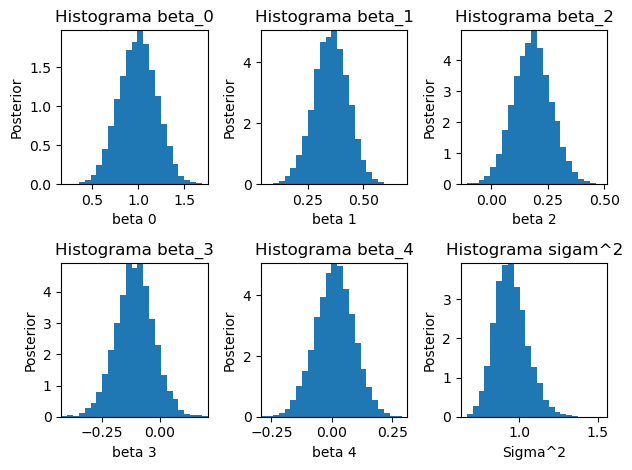

In [79]:
xsim_MH = np.delete(xsim_MH, range(bsample), 1)

num_bins = 25
fig, axs = plt.subplots(2,3)

n, bins, patches = axs[0,0].hist(xsim_MH[0,:], num_bins, density=1)
axs[0,0].set_xlabel('beta 0')
axs[0,0].set_ylabel('Posterior')
axs[0,0].set_title(r'Histograma beta_0')
axs[0,0].autoscale(enable=True, axis='both', tight=True)

n, bins, patches = axs[0,1].hist(xsim_MH[1,:], num_bins, density=1)
axs[0,1].set_xlabel('beta 1')
axs[0,1].set_ylabel('Posterior')
axs[0,1].set_title(r'Histograma beta_1')
axs[0,1].autoscale(enable=True, axis='both', tight=True)

n, bins, patches = axs[0,2].hist(xsim_MH[2,:], num_bins, density=1)
axs[0,2].set_xlabel('beta 2')
axs[0,2].set_ylabel('Posterior')
axs[0,2].set_title(r'Histograma beta_2')
axs[0,2].autoscale(enable=True, axis='both', tight=True)

n, bins, patches = axs[1,0].hist(xsim_MH[3,:], num_bins, density=1)
axs[1,0].set_xlabel('beta 3')
axs[1,0].set_ylabel('Posterior')
axs[1,0].set_title(r'Histograma beta_3')
axs[1,0].autoscale(enable=True, axis='both', tight=True)

n, bins, patches = axs[1,1].hist(xsim_MH[4,:], num_bins, density=1)
axs[1,1].set_xlabel('beta 4')
axs[1,1].set_ylabel('Posterior')
axs[1,1].set_title(r'Histograma beta_4')
axs[1,1].autoscale(enable=True, axis='both', tight=True)

n, bins, patches = axs[1,2].hist(xsim_MH[5,:], num_bins, density=1)
axs[1,2].set_xlabel('Sigma^2')
axs[1,2].set_ylabel('Posterior')
axs[1,2].set_title(r'Histograma sigam^2')
axs[1,2].autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()

In [81]:
theta_mean_mh = np.mean(xsim_MH,axis=1)
theta_mean_mh.shape = (6,1)

theta_std_mh = np.std(xsim_MH,axis=1)
theta_std_mh.shape = (6,1)

theta_Q5_mh = np.percentile(xsim_MH, 5, axis=1)
theta_Q5_mh.shape = (6,1)

theta_Q95_mh = np.percentile(xsim_MH, 95, axis=1)
theta_Q95_mh.shape = (6,1)

In [82]:
print('|===========================================================================|')
print('|        | Prior       | Posterior                       | MCO              |')
print('|        |-------------|---------------------------------|------------------|') 
print('|        | Mean | SD   | Mean   | SD    | Q5     | Q95   | Est.   | SE      |')
print('|---------------------------------------------------------------------------|')
print('|mu      |  %1.0f   | %1.0f |  %1.3f | %1.3f |  %1.3f | %1.3f |  %1.3f | (%1.3f) |' %(beta_prior[0,0],Sigma_prior[0,0],theta_mean_mh[0,0],theta_std_mh[0,0],theta_Q5_mh[0,0],theta_Q95_mh[0,0],beta_ols[0,0],beta_ols_std[0,0]))
print('|phi1    |  %1.0f   | %1.0f |  %1.3f | %1.3f |  %1.3f | %1.3f |  %1.3f | (%1.3f) |' %(beta_prior[1,0],Sigma_prior[1,1],theta_mean_mh[1,0],theta_std_mh[1,0],theta_Q5_mh[1,0],theta_Q95_mh[1,0],beta_ols[1,0],beta_ols_std[1,0]))
print('|phi2    |  %1.0f   | %1.0f |  %1.3f | %1.3f |  %1.3f | %1.3f |  %1.3f | (%1.3f) |' %(beta_prior[2,0],Sigma_prior[2,2],theta_mean_mh[2,0],theta_std_mh[2,0],theta_Q5_mh[2,0],theta_Q95_mh[2,0],beta_ols[2,0],beta_ols_std[2,0]))
print('|phi3    |  %1.0f   | %1.0f | %1.3f | %1.3f | %1.3f | %1.3f | %1.3f | (%1.3f) |'    %(beta_prior[3,0],Sigma_prior[3,3],theta_mean_mh[3,0],theta_std_mh[3,0],theta_Q5_mh[3,0],theta_Q95_mh[3,0],beta_ols[3,0],beta_ols_std[3,0]))
print('|phi4    |  %1.0f   | %1.0f |  %1.3f | %1.3f | %1.3f | %1.3f |  %1.3f | (%1.3f) |'  %(beta_prior[4,0],Sigma_prior[4,4],theta_mean_mh[4,0],theta_std_mh[4,0],theta_Q5_mh[4,0],theta_Q95_mh[4,0],beta_ols[4,0],beta_ols_std[4,0]))
print('|sigma^2 |  %1.0f   |   %1.0f  |  %1.3f | %1.3f |  %1.3f | %1.3f |  %1.3f |'        %(              5, (1/12)*(10**2) ,theta_mean_mh[5,0],theta_std_mh[5,0],theta_Q5_mh[5,0],theta_Q95_mh[5,0],sigma2_ols))
print('|===========================================================================|')


|===========================================================================|
|        | Prior       | Posterior                       | MCO              |
|        |-------------|---------------------------------|------------------|
|        | Mean | SD   | Mean   | SD    | Q5     | Q95   | Est.   | SE      |
|---------------------------------------------------------------------------|
|mu      |  0   | 1000 |  0.994 | 0.202 |  0.661 | 1.322 |  0.997 | (0.199) |
|phi1    |  0   | 1000 |  0.353 | 0.078 |  0.222 | 0.477 |  0.351 | (0.078) |
|phi2    |  0   | 1000 |  0.181 | 0.083 |  0.046 | 0.321 |  0.179 | (0.082) |
|phi3    |  0   | 1000 | -0.108 | 0.082 | -0.243 | 0.027 | -0.106 | (0.081) |
|phi4    |  0   | 1000 |  0.011 | 0.079 | -0.122 | 0.141 |  0.011 | (0.077) |
|sigma^2 |  5   |   8  |  0.947 | 0.103 |  0.790 | 1.129 |  0.923 |
|===========================================================================|
